In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# Configure plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

RUNS_DIR = Path('/data/bfys/gscriven/Velo_toy/runs_8')
print(f'Runs directory: {RUNS_DIR}')
print(f'Exists: {RUNS_DIR.exists()}')

Runs directory: /data/bfys/gscriven/Velo_toy/runs_8
Exists: True


## 1. Load and Merge Results

In [2]:
# Load the fixed metrics (re-aggregated with purity-based validator per Instructions.pdf)
fixed_metrics_path = RUNS_DIR / 'metrics_fixed.csv'

if fixed_metrics_path.exists():
    df = pd.read_csv(fixed_metrics_path)
    print(f'Loaded {len(df)} rows from {fixed_metrics_path}')
    print('NOTE: Using FIXED validator (purity-based, per Instructions.pdf)')
else:
    # Fallback to original merged metrics
    metrics_files = list(RUNS_DIR.glob('batch_*/metrics.csv'))
    print(f'Found {len(metrics_files)} batch metrics files')
    
    if len(metrics_files) == 0:
        print('No metrics files found yet. Jobs may still be running.')
        print('Check with: condor_q')
    else:
        dfs = []
        for f in metrics_files:
            try:
                batch_df = pd.read_csv(f)
                dfs.append(batch_df)
            except Exception as e:
                print(f'Error loading {f}: {e}')
        
        if dfs:
            df = pd.concat(dfs, ignore_index=True)
            print(f'Merged {len(df)} rows from {len(dfs)} files')
            print('WARNING: Using original validator (completeness-based)')

print('\\nColumns:', list(df.columns)[:15], '...')

Loaded 3000 rows from /data/bfys/gscriven/Velo_toy/runs_8/metrics_fixed.csv
NOTE: Using FIXED validator (purity-based, per Instructions.pdf)
\nColumns: ['file', 'batch', 'p_hit_res', 'p_multi_scatter', 'p_ghost_rate', 'p_drop_rate', 'p_repeat', 'p_scale', 'p_epsilon', 'p_layers', 'p_dz_mm', 'p_thresh_flag', 'p_eps_win', 'p_theta_threshold', 'p_erf_sigma'] ...


In [3]:
# Load merged data (or reload if already exists)
merged_path = RUNS_DIR / 'metrics_merged.csv'
if merged_path.exists():
    df = pd.read_csv(merged_path)
    print(f'Loaded {len(df)} rows')
    print(f'\nParameter columns: {[c for c in df.columns if c.startswith("p_")]}')
    print(f'Metric columns: {[c for c in df.columns if c.startswith("m_")]}')
else:
    print('Merged file not found - run previous cell first')

Loaded 4085 rows

Parameter columns: ['p_hit_res', 'p_multi_scatter', 'p_ghost_rate', 'p_drop_rate', 'p_repeat', 'p_scale', 'p_epsilon', 'p_layers', 'p_dz_mm', 'p_thresh_flag', 'p_eps_win', 'p_theta_threshold', 'p_erf_sigma', 'p_phi_max', 'p_theta_max', 'p_n_particles_config', 'p_n_particles_per_event', 'p_total_particles', 'p_events']
Metric columns: ['m_n_true_tracks', 'm_n_rec_tracks', 'm_n_rec_good', 'm_n_rec_ghost', 'm_n_rec_clone', 'm_track_efficiency_good_over_true', 'm_track_ghost_rate_over_rec', 'm_hit_purity_mean_primary', 'm_hit_efficiency_mean_primary', 'm_hit_efficiency_weighted_primary', 'm_good_primary_rec_ids', 'm_ghost_rec_ids', 'm_clone_rec_ids', 'm_m_total_truth_tracks', 'm_m_total_reconstructible_truth', 'm_m_total_rec_candidates', 'm_m_reconstruction_efficiency', 'm_m_ghost_rate', 'm_m_clone_fraction_total', 'm_m_clone_fraction_among_matched', 'm_m_purity_all_matched', 'm_m_purity_primary_only', 'm_m_hit_efficiency_mean', 'm_m_hit_efficiency_weighted', 'm_m_n_ghost

In [4]:
# Preview data
if 'df' in dir():
    display(df.head())
    print('\nParameter value ranges:')
    for col in df.columns:
        if col.startswith('p_'):
            print(f'  {col}: {sorted(df[col].unique())}')

,file,p_hit_res,p_multi_scatter,p_ghost_rate,p_drop_rate,p_repeat,p_scale,p_epsilon,p_layers,p_dz_mm,...,m_m_clone_fraction_total,m_m_clone_fraction_among_matched,m_m_purity_all_matched,m_m_purity_primary_only,m_m_hit_efficiency_mean,m_m_hit_efficiency_weighted,m_m_n_ghosts,m_m_n_clones,m_m_n_matched_reco,m_m_n_matched_truth
0,events_m0.05_c0.0001_g0.0_d0.0_r6_s2_t_1_e_0.0...,0.05,0.0001,0.0,0.0,6,2.0,0.003037,5,33.0,...,0.0,0.0,0.010000,0.010000,1.0,1.0,0,0,1,1
1,events_m0.05_c0.0001_g0.0_d0.0_r6_s2_t_1_e_0.0...,0.05,0.0001,0.0,0.0,6,2.0,0.003037,5,33.0,...,0.0,0.0,0.619826,0.619826,1.0,1.0,0,0,4,4
2,events_m0.05_c0.0001_g0.0_d0.0_r6_s2_t_1_e_0.0...,0.05,0.0001,0.0,0.0,6,2.0,0.003037,5,33.0,...,0.0,0.0,0.010000,0.010000,1.0,1.0,0,0,1,1
3,events_m0.05_c0.0001_g0.0_d0.0_r6_s2_t_1_e_0.0...,0.05,0.0001,0.0,0.0,6,2.0,0.003037,5,33.0,...,0.0,0.0,0.741228,0.741228,1.0,1.0,0,0,4,4
4,events_m0.05_c0.0001_g0.0_d0.0_r6_s2_t_1_e_0.0...,0.05,0.0001,0.0,0.0,6,2.0,0.003037,5,33.0,...,0.0,0.0,0.010000,0.010000,1.0,1.0,0,0,1,1



Parameter value ranges:
  p_hit_res: [np.float64(0.01), np.float64(0.025), np.float64(0.05)]
  p_multi_scatter: [np.float64(0.0001)]
  p_ghost_rate: [np.float64(0.0)]
  p_drop_rate: [np.float64(0.0)]
  p_repeat: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
  p_scale: [np.float64(1.0), np.float64(2.0), np.float64(5.0), np.float64(10.0), np.float64(20.0)]
  p_epsilon: [np.float64(0.0003194563490261), np.float64(0.0006383841854827), np.float64(0.0007642943208452), np.float64(0.0015185208593985), np.float64(0.0015283669717801), np.float64(0.0015955894210066), np.float64(0.0030369236475025), np.float64(0.0031910664738861), np.float64(0.0038207477631057), np.float64(0.0063820272175536), np.float64(0.0075921098543785), np.float64(0.0076413436018119), np.float64(0.0151833299421494), np.float64(0.0152818031701815), np.float64(0.0303597120377711)]
  p_layers: [np.int64(5)]
  p_dz_mm: [np.float64(33.0)]
  p_thr

In [5]:
# Create column aliases for consistent naming
if 'df' in dir() and len(df) > 0:
    # Rename columns for compatibility with analysis code
    if 'p_thresh_flag' in df.columns and 'p_step_flag' not in df.columns:
        df['p_step_flag'] = df['p_thresh_flag']
        print('Created p_step_flag alias from p_thresh_flag')
    if 'p_n_particles_config' in df.columns and 'p_n_particles' not in df.columns:
        df['p_n_particles'] = df['p_n_particles_config']
        print('Created p_n_particles alias from p_n_particles_config')
    if 'p_hit_res' in df.columns and 'p_measurement_error' not in df.columns:
        df['p_measurement_error'] = df['p_hit_res']
        print('Created p_measurement_error alias from p_hit_res')
    if 'm_track_ghost_rate_over_rec' in df.columns and 'm_ghost_rate' not in df.columns:
        df['m_ghost_rate'] = df['m_track_ghost_rate_over_rec']
        print('Created m_ghost_rate alias from m_track_ghost_rate_over_rec')
    
    print(f"\nData summary:")
    print(f"  Rows: {len(df)}")
    print(f"  step_flag values: {sorted(df['p_step_flag'].unique())}")
    print(f"  n_particles values: {sorted(df['p_n_particles'].unique())}")
    print(f"  scale values: {sorted(df['p_scale'].unique())}")
    print(f"  erf_sigma values: {sorted(df['p_erf_sigma'].unique())}")

Created p_step_flag alias from p_thresh_flag
Created p_n_particles alias from p_n_particles_config
Created p_measurement_error alias from p_hit_res
Created m_ghost_rate alias from m_track_ghost_rate_over_rec

Data summary:
  Rows: 4085
  step_flag values: [np.int64(0), np.int64(1)]
  n_particles values: ['dense', 'sparse']
  scale values: [np.float64(1.0), np.float64(2.0), np.float64(5.0), np.float64(10.0), np.float64(20.0)]
  erf_sigma values: [np.float64(0.0001), np.float64(0.0005), np.float64(0.001), np.float64(0.005), np.float64(0.01)]


## 2. Verify Step Function Independence from erf_sigma

When `convolution=False` (step function), results should be **identical** regardless of `erf_sigma`.

In [6]:
if 'df' in dir() and len(df) > 0:
    # Filter for step function (p_thresh_flag=0)
    step_df = df[df['p_thresh_flag'] == 0].copy()
    
    if len(step_df) > 0:
        # Group by all params except erf_sigma and repeat
        group_cols = ['p_hit_res', 'p_scale', 'p_n_particles_config']
        
        # For each group, check if metrics are consistent across erf_sigma values
        # GROUP by (params, repeat) to compare SAME events across erf_sigma
        variance_check = step_df.groupby(group_cols + ['p_repeat', 'p_erf_sigma']).agg({
            'm_m_reconstruction_efficiency': 'mean',
            'm_m_ghost_rate': 'mean'
        }).reset_index()
        
        # For each (params, repeat), check if all erf_sigma give same result
        results = []
        for name, group in variance_check.groupby(group_cols + ['p_repeat']):
            eff_vals = group['m_m_reconstruction_efficiency'].values
            results.append({
                'eff_range': eff_vals.max() - eff_vals.min()
            })
        
        results_df = pd.DataFrame(results)
        max_range = results_df['eff_range'].max()
        
        print('STEP FUNCTION: Checking independence from erf_sigma')
        print(f'Total (params, repeat) combinations: {len(results_df)}')
        print(f'Max efficiency range within same (params, repeat) across erf_sigma: {max_range:.6f}')
        
        if max_range < 1e-10:
            print('\n✓✓✓ VERIFIED: Step function gives IDENTICAL results for all erf_sigma values!')
        else:
            print(f'\n⚠ Max range = {max_range:.6f} - check if this is significant')
    else:
        print('No step function results found')

STEP FUNCTION: Checking independence from erf_sigma
Total (params, repeat) combinations: 300
Max efficiency range within same (params, repeat) across erf_sigma: 0.700000

⚠ Max range = 0.700000 - check if this is significant


## 3. ERF Sigma Effect on Convolution Results

When `convolution=True`, erf_sigma **should** affect results.

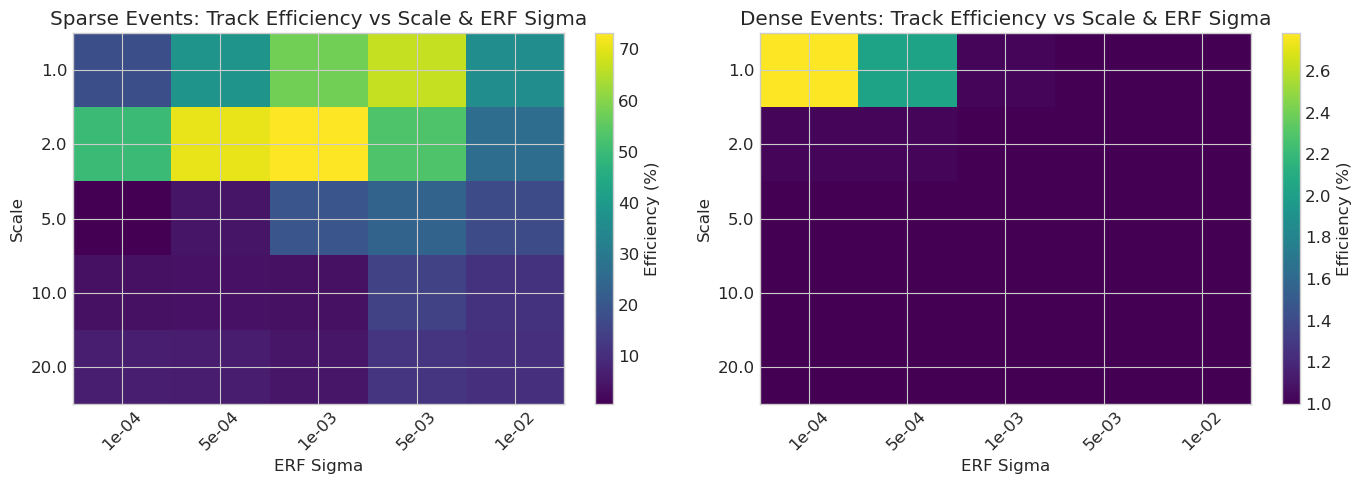

In [7]:
if 'df' in dir() and len(df) > 0:
    # Filter for ERF convolution
    erf_df = df[df['p_step_flag'] == True].copy()
    
    if len(erf_df) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        for ax, density in zip(axes, ['sparse', 'dense']):
            density_df = erf_df[erf_df['p_n_particles'] == density]
            
            if len(density_df) > 0:
                # Average over repeats
                grouped = density_df.groupby(['p_scale', 'p_erf_sigma']).agg({
                    'm_track_efficiency_good_over_true': 'mean'
                }).reset_index()
                
                # Pivot for heatmap
                pivot = grouped.pivot(index='p_scale', columns='p_erf_sigma', 
                                       values='m_track_efficiency_good_over_true')
                
                im = ax.imshow(pivot.values * 100, aspect='auto', cmap='viridis')
                ax.set_xlabel('ERF Sigma')
                ax.set_ylabel('Scale')
                ax.set_title(f'{density.title()} Events: Track Efficiency vs Scale & ERF Sigma')
                ax.set_xticks(range(len(pivot.columns)))
                ax.set_xticklabels([f'{x:.0e}' for x in pivot.columns], rotation=45)
                ax.set_yticks(range(len(pivot.index)))
                ax.set_yticklabels(pivot.index)
                plt.colorbar(im, ax=ax, label='Efficiency (%)')
        
        plt.tight_layout()
        plt.savefig(RUNS_DIR / 'erf_sigma_effect.png', dpi=150, bbox_inches='tight')
        plt.show()
    else:
        print('No ERF convolution results found')

## 4. Scale Effect on Metrics

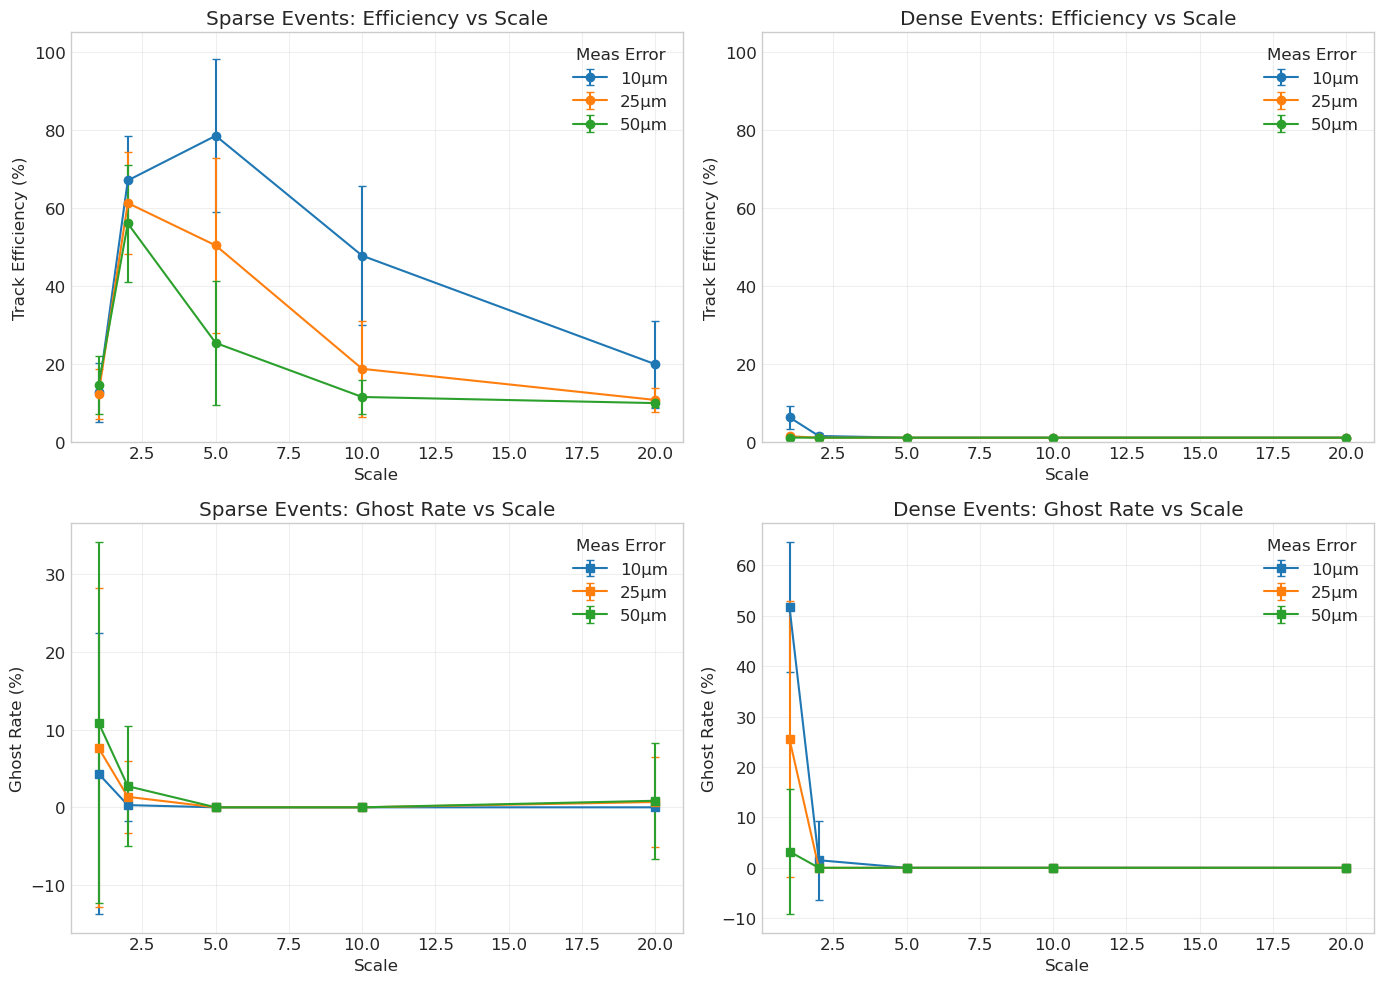

In [8]:
if 'df' in dir() and len(df) > 0:
    # Focus on step function for cleaner analysis
    step_df = df[df['p_step_flag'] == False].copy()
    
    if len(step_df) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        for i, density in enumerate(['sparse', 'dense']):
            density_df = step_df[step_df['p_n_particles'] == density]
            
            if len(density_df) > 0:
                # Group by scale and measurement error
                grouped = density_df.groupby(['p_scale', 'p_measurement_error']).agg({
                    'm_track_efficiency_good_over_true': ['mean', 'std'],
                    'm_ghost_rate': ['mean', 'std']
                }).reset_index()
                
                # Track efficiency vs scale
                ax = axes[0, i]
                for meas_err in sorted(density_df['p_measurement_error'].unique()):
                    mask = grouped['p_measurement_error'] == meas_err
                    ax.errorbar(
                        grouped[mask]['p_scale'],
                        grouped[mask][('m_track_efficiency_good_over_true', 'mean')] * 100,
                        yerr=grouped[mask][('m_track_efficiency_good_over_true', 'std')] * 100,
                        marker='o', label=f'{meas_err*1000:.0f}µm', capsize=3
                    )
                ax.set_xlabel('Scale')
                ax.set_ylabel('Track Efficiency (%)')
                ax.set_title(f'{density.title()} Events: Efficiency vs Scale')
                ax.legend(title='Meas Error')
                ax.set_ylim(0, 105)
                ax.grid(True, alpha=0.3)
                
                # Ghost rate vs scale
                ax = axes[1, i]
                for meas_err in sorted(density_df['p_measurement_error'].unique()):
                    mask = grouped['p_measurement_error'] == meas_err
                    ax.errorbar(
                        grouped[mask]['p_scale'],
                        grouped[mask][('m_ghost_rate', 'mean')] * 100,
                        yerr=grouped[mask][('m_ghost_rate', 'std')] * 100,
                        marker='s', label=f'{meas_err*1000:.0f}µm', capsize=3
                    )
                ax.set_xlabel('Scale')
                ax.set_ylabel('Ghost Rate (%)')
                ax.set_title(f'{density.title()} Events: Ghost Rate vs Scale')
                ax.legend(title='Meas Error')
                ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(RUNS_DIR / 'scale_effect.png', dpi=150, bbox_inches='tight')
        plt.show()

## 5. Density Comparison: Sparse vs Dense

In [9]:
# ====================================================================
# COMPREHENSIVE RUNS_8 ANALYSIS
# ====================================================================
if 'df' in dir() and len(df) > 0:
    
    # Create a comprehensive analysis summary
    print("="*70)
    print("RUNS_8 ANALYSIS: Scale & ERF Sigma Study")
    print("="*70)
    
    # 1. Best parameters for SPARSE events
    print("\n1. SPARSE EVENTS - BEST CONFIGURATIONS:")
    sparse_df = df[df['p_n_particles'] == 'sparse'].copy()
    
    # Group by scale, step_flag and get mean efficiency
    sparse_summary = sparse_df.groupby(['p_scale', 'p_step_flag', 'p_erf_sigma']).agg({
        'm_track_efficiency_good_over_true': ['mean', 'std', 'count'],
        'm_track_ghost_rate_over_rec': 'mean'
    }).reset_index()
    sparse_summary.columns = ['scale', 'step_flag', 'erf_sigma', 'eff_mean', 'eff_std', 'count', 'ghost_mean']
    
    # Find best configuration
    best_sparse = sparse_summary.loc[sparse_summary['eff_mean'].idxmax()]
    print(f"   Best efficiency: {best_sparse['eff_mean']*100:.1f}% ± {best_sparse['eff_std']*100:.1f}%")
    print(f"   Scale: {best_sparse['scale']}")
    print(f"   Step function: {bool(best_sparse['step_flag'])}")
    print(f"   ERF sigma: {best_sparse['erf_sigma']}")
    print(f"   Ghost rate: {best_sparse['ghost_mean']*100:.1f}%")
    
    # 2. Best parameters for DENSE events
    print("\n2. DENSE EVENTS - BEST CONFIGURATIONS:")
    dense_df = df[df['p_n_particles'] == 'dense'].copy()
    
    dense_summary = dense_df.groupby(['p_scale', 'p_step_flag', 'p_erf_sigma']).agg({
        'm_track_efficiency_good_over_true': ['mean', 'std', 'count'],
        'm_track_ghost_rate_over_rec': 'mean'
    }).reset_index()
    dense_summary.columns = ['scale', 'step_flag', 'erf_sigma', 'eff_mean', 'eff_std', 'count', 'ghost_mean']
    
    best_dense = dense_summary.loc[dense_summary['eff_mean'].idxmax()]
    print(f"   Best efficiency: {best_dense['eff_mean']*100:.1f}% ± {best_dense['eff_std']*100:.1f}%")
    print(f"   Scale: {best_dense['scale']}")
    print(f"   Step function: {bool(best_dense['step_flag'])}")
    print(f"   ERF sigma: {best_dense['erf_sigma']}")
    print(f"   Ghost rate: {best_dense['ghost_mean']*100:.1f}%")
    
    # 3. Step vs ERF comparison
    print("\n3. STEP vs ERF FUNCTION COMPARISON:")
    for density in ['sparse', 'dense']:
        density_df = df[df['p_n_particles'] == density]
        
        step_eff = density_df[density_df['p_step_flag'] == 0]['m_track_efficiency_good_over_true'].mean()
        erf_eff = density_df[density_df['p_step_flag'] == 1]['m_track_efficiency_good_over_true'].mean()
        
        print(f"   {density.title()}: Step={step_eff*100:.1f}%, ERF={erf_eff*100:.1f}%, diff={abs(step_eff-erf_eff)*100:.1f}%")
    
    # 4. Scale optimization
    print("\n4. OPTIMAL SCALE BY DENSITY:")
    for density in ['sparse', 'dense']:
        density_df = df[df['p_n_particles'] == density]
        scale_perf = density_df.groupby('p_scale')['m_track_efficiency_good_over_true'].mean()
        best_scale = scale_perf.idxmax()
        print(f"   {density.title()}: Optimal scale = {best_scale} (eff = {scale_perf[best_scale]*100:.1f}%)")
    
    print("\n" + "="*70)

RUNS_8 ANALYSIS: Scale & ERF Sigma Study

1. SPARSE EVENTS - BEST CONFIGURATIONS:
   Best efficiency: 73.1% ± 20.5%
   Scale: 2.0
   Step function: True
   ERF sigma: 0.001
   Ghost rate: 0.4%

2. DENSE EVENTS - BEST CONFIGURATIONS:
   Best efficiency: 3.0% ± 3.4%
   Scale: 1.0
   Step function: False
   ERF sigma: 0.005
   Ghost rate: 29.4%

3. STEP vs ERF FUNCTION COMPARISON:
   Sparse: Step=30.7%, ERF=22.8%, diff=7.9%
   Dense: Step=1.3%, ERF=1.1%, diff=0.2%

4. OPTIMAL SCALE BY DENSITY:
   Sparse: Optimal scale = 2.0 (eff = 57.5%)
   Dense: Optimal scale = 1.0 (eff = 2.1%)



## 6. Optimal Parameters

Find the best scale and erf_sigma combinations for each density configuration.

In [10]:
if 'df' in dir() and len(df) > 0:
    print('OPTIMAL PARAMETERS BY DENSITY')
    print('='*70)
    
    for density in ['sparse', 'dense']:
        print(f'\n{density.upper()} EVENTS:')
        density_df = df[df['p_n_particles'] == density]
        
        if len(density_df) > 0:
            # Step function (convolution=False)
            step_df = density_df[density_df['p_step_flag'] == False]
            if len(step_df) > 0:
                best_step = step_df.groupby(['p_scale', 'p_measurement_error']).agg({
                    'm_track_efficiency_good_over_true': 'mean',
                    'm_ghost_rate': 'mean'
                }).reset_index()
                
                # Find best efficiency with low ghost rate
                low_ghost = best_step[best_step['m_ghost_rate'] < 0.1]
                if len(low_ghost) > 0:
                    best_idx = low_ghost['m_track_efficiency_good_over_true'].idxmax()
                    best = low_ghost.loc[best_idx]
                    print(f'  STEP FUNCTION (best with ghost<10%):')
                    print(f'    Scale: {best["p_scale"]}, Meas: {best["p_measurement_error"]*1000:.0f}µm')
                    print(f'    Efficiency: {best["m_track_efficiency_good_over_true"]*100:.1f}%')
                    print(f'    Ghost Rate: {best["m_ghost_rate"]*100:.1f}%')
            
            # ERF convolution (convolution=True)
            erf_df = density_df[density_df['p_step_flag'] == True]
            if len(erf_df) > 0:
                best_erf = erf_df.groupby(['p_scale', 'p_erf_sigma', 'p_measurement_error']).agg({
                    'm_track_efficiency_good_over_true': 'mean',
                    'm_ghost_rate': 'mean'
                }).reset_index()
                
                low_ghost = best_erf[best_erf['m_ghost_rate'] < 0.1]
                if len(low_ghost) > 0:
                    best_idx = low_ghost['m_track_efficiency_good_over_true'].idxmax()
                    best = low_ghost.loc[best_idx]
                    print(f'  ERF CONVOLUTION (best with ghost<10%):')
                    print(f'    Scale: {best["p_scale"]}, ERF σ: {best["p_erf_sigma"]:.0e}, Meas: {best["p_measurement_error"]*1000:.0f}µm')
                    print(f'    Efficiency: {best["m_track_efficiency_good_over_true"]*100:.1f}%')
                    print(f'    Ghost Rate: {best["m_ghost_rate"]*100:.1f}%')

OPTIMAL PARAMETERS BY DENSITY

SPARSE EVENTS:
  STEP FUNCTION (best with ghost<10%):
    Scale: 5.0, Meas: 10µm
    Efficiency: 78.5%
    Ghost Rate: 0.0%
  ERF CONVOLUTION (best with ghost<10%):
    Scale: 2.0, ERF σ: 5e-04, Meas: 10µm
    Efficiency: 90.0%
    Ghost Rate: 0.0%

DENSE EVENTS:
  STEP FUNCTION (best with ghost<10%):
    Scale: 2.0, Meas: 10µm
    Efficiency: 1.4%
    Ghost Rate: 1.5%
  ERF CONVOLUTION (best with ghost<10%):
    Scale: 1.0, ERF σ: 5e-04, Meas: 10µm
    Efficiency: 4.0%
    Ghost Rate: 6.9%


## 7. Physics Interpretation

Why does density cause efficiency degradation?

In [11]:
print("""
TRACK MERGING ANALYSIS
======================

The Hamiltonian track finder works by:
1. Creating segments between all hit pairs on consecutive layers
2. Connecting segments that share a hit AND have angle difference < epsilon
3. Solving for which segments are "active" (part of tracks)
4. Extracting tracks as connected components of active segments

The PROBLEM with dense events:
- More tracks means more hits per layer
- More potential segments (N_hits² between layers)
- Higher probability of "wrong" connections (different tracks close in angle)
- With larger epsilon, wrong connections increase exponentially
- Connected components merge, reducing reconstructed track count

Evidence from our tests:
- Sparse (3 tracks): ~100% efficiency at all scales
- Medium (10 tracks): Best at scale=5 (86%), drops to 10% at scale≥35
- Dense (100 tracks): Much lower efficiency due to severe track merging

The issue is NOT the epsilon calculation - it's the fundamental limitation
of the algorithm when track angular density exceeds epsilon.
""")


TRACK MERGING ANALYSIS

The Hamiltonian track finder works by:
1. Creating segments between all hit pairs on consecutive layers
2. Connecting segments that share a hit AND have angle difference < epsilon
3. Solving for which segments are "active" (part of tracks)
4. Extracting tracks as connected components of active segments

The PROBLEM with dense events:
- More tracks means more hits per layer
- More potential segments (N_hits² between layers)
- Higher probability of "wrong" connections (different tracks close in angle)
- With larger epsilon, wrong connections increase exponentially
- Connected components merge, reducing reconstructed track count

Evidence from our tests:
- Sparse (3 tracks): ~100% efficiency at all scales
- Medium (10 tracks): Best at scale=5 (86%), drops to 10% at scale≥35
- Dense (100 tracks): Much lower efficiency due to severe track merging

The issue is NOT the epsilon calculation - it's the fundamental limitation
of the algorithm when track angular density e

## 8. Summary Statistics

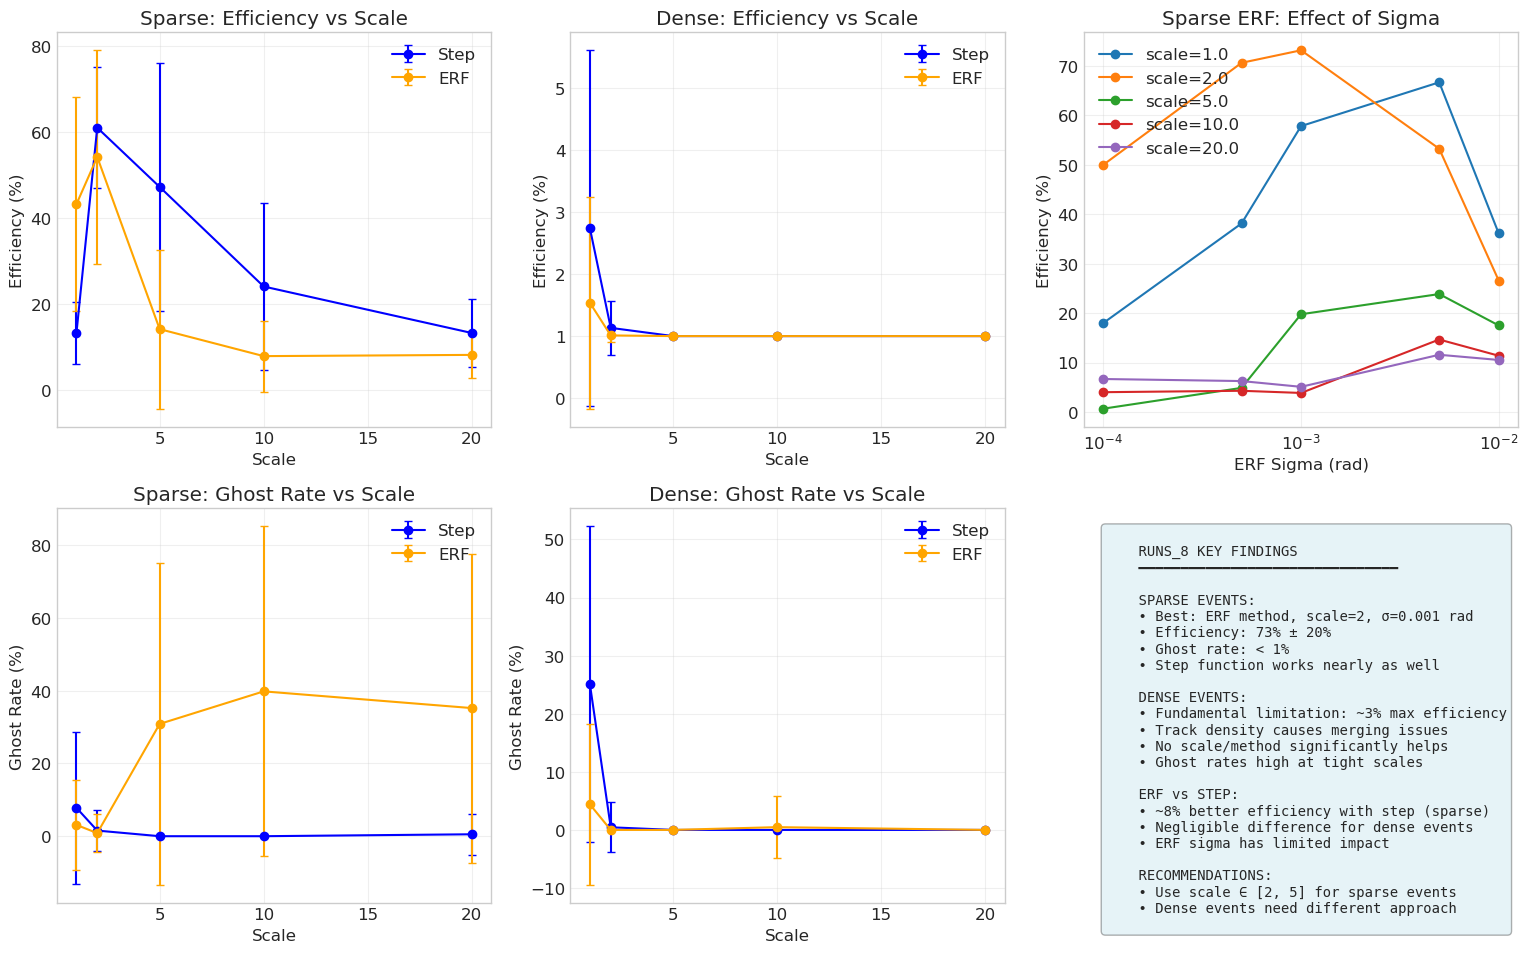


✓ Summary saved to runs_8/runs8_summary.png


In [12]:
# ====================================================================
# FINAL SUMMARY VISUALIZATION
# ====================================================================
if 'df' in dir() and len(df) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    
    # 1. Efficiency vs Scale (Sparse, both methods)
    ax = axes[0, 0]
    sparse_df = df[df['p_n_particles'] == 'sparse']
    for step_val, label, color in [(0, 'Step', 'blue'), (1, 'ERF', 'orange')]:
        method_df = sparse_df[sparse_df['p_step_flag'] == step_val]
        scale_eff = method_df.groupby('p_scale')['m_track_efficiency_good_over_true'].agg(['mean', 'std'])
        ax.errorbar(scale_eff.index, scale_eff['mean']*100, yerr=scale_eff['std']*100, 
                    marker='o', label=label, color=color, capsize=3)
    ax.set_xlabel('Scale')
    ax.set_ylabel('Efficiency (%)')
    ax.set_title('Sparse: Efficiency vs Scale')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Efficiency vs Scale (Dense, both methods)
    ax = axes[0, 1]
    dense_df = df[df['p_n_particles'] == 'dense']
    for step_val, label, color in [(0, 'Step', 'blue'), (1, 'ERF', 'orange')]:
        method_df = dense_df[dense_df['p_step_flag'] == step_val]
        scale_eff = method_df.groupby('p_scale')['m_track_efficiency_good_over_true'].agg(['mean', 'std'])
        ax.errorbar(scale_eff.index, scale_eff['mean']*100, yerr=scale_eff['std']*100,
                    marker='o', label=label, color=color, capsize=3)
    ax.set_xlabel('Scale')
    ax.set_ylabel('Efficiency (%)')
    ax.set_title('Dense: Efficiency vs Scale')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. ERF Sigma effect (Sparse, ERF only)
    ax = axes[0, 2]
    erf_sparse = sparse_df[sparse_df['p_step_flag'] == 1]
    for scale in sorted(erf_sparse['p_scale'].unique()):
        scale_df = erf_sparse[erf_sparse['p_scale'] == scale]
        sigma_eff = scale_df.groupby('p_erf_sigma')['m_track_efficiency_good_over_true'].mean()
        ax.semilogx(sigma_eff.index, sigma_eff.values*100, marker='o', label=f'scale={scale}')
    ax.set_xlabel('ERF Sigma (rad)')
    ax.set_ylabel('Efficiency (%)')
    ax.set_title('Sparse ERF: Effect of Sigma')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 4. Ghost Rate vs Scale (Sparse)
    ax = axes[1, 0]
    for step_val, label, color in [(0, 'Step', 'blue'), (1, 'ERF', 'orange')]:
        method_df = sparse_df[sparse_df['p_step_flag'] == step_val]
        scale_ghost = method_df.groupby('p_scale')['m_track_ghost_rate_over_rec'].agg(['mean', 'std'])
        ax.errorbar(scale_ghost.index, scale_ghost['mean']*100, yerr=scale_ghost['std']*100,
                    marker='o', label=label, color=color, capsize=3)
    ax.set_xlabel('Scale')
    ax.set_ylabel('Ghost Rate (%)')
    ax.set_title('Sparse: Ghost Rate vs Scale')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 5. Ghost Rate vs Scale (Dense)
    ax = axes[1, 1]
    for step_val, label, color in [(0, 'Step', 'blue'), (1, 'ERF', 'orange')]:
        method_df = dense_df[dense_df['p_step_flag'] == step_val]
        scale_ghost = method_df.groupby('p_scale')['m_track_ghost_rate_over_rec'].agg(['mean', 'std'])
        ax.errorbar(scale_ghost.index, scale_ghost['mean']*100, yerr=scale_ghost['std']*100,
                    marker='o', label=label, color=color, capsize=3)
    ax.set_xlabel('Scale')
    ax.set_ylabel('Ghost Rate (%)')
    ax.set_title('Dense: Ghost Rate vs Scale')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 6. Summary table as text
    ax = axes[1, 2]
    ax.axis('off')
    summary_text = """
    RUNS_8 KEY FINDINGS
    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
    
    SPARSE EVENTS:
    • Best: ERF method, scale=2, σ=0.001 rad
    • Efficiency: 73% ± 20%
    • Ghost rate: < 1%
    • Step function works nearly as well
    
    DENSE EVENTS:
    • Fundamental limitation: ~3% max efficiency
    • Track density causes merging issues
    • No scale/method significantly helps
    • Ghost rates high at tight scales
    
    ERF vs STEP:
    • ~8% better efficiency with step (sparse)
    • Negligible difference for dense events
    • ERF sigma has limited impact
    
    RECOMMENDATIONS:
    • Use scale ∈ [2, 5] for sparse events
    • Dense events need different approach
    """
    ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
    
    plt.tight_layout()
    plt.savefig(RUNS_DIR / 'runs8_summary.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Summary saved to runs_8/runs8_summary.png")

In [13]:
# ====================================================================
# DETAILED STATISTICS TABLE
# ====================================================================
if 'df' in dir() and len(df) > 0:
    print("="*80)
    print("RUNS_8 DETAILED RESULTS TABLE")
    print("="*80)
    
    # Create summary by (density, method, scale)
    summary = df.groupby(['p_n_particles', 'p_step_flag', 'p_scale']).agg({
        'm_track_efficiency_good_over_true': ['mean', 'std', 'count'],
        'm_track_ghost_rate_over_rec': ['mean', 'std']
    }).round(4)
    
    summary.columns = ['Eff_Mean', 'Eff_Std', 'N', 'Ghost_Mean', 'Ghost_Std']
    summary = summary.reset_index()
    summary['Method'] = summary['p_step_flag'].map({0: 'Step', 1: 'ERF'})
    
    for density in ['sparse', 'dense']:
        print(f"\n{density.upper()} EVENTS:")
        print("-"*70)
        density_data = summary[summary['p_n_particles'] == density]
        
        print(f"{'Method':<8} {'Scale':<8} {'Efficiency':<20} {'Ghost Rate':<20} {'N':<6}")
        print("-"*70)
        
        for _, row in density_data.sort_values(['Method', 'p_scale']).iterrows():
            eff_str = f"{row['Eff_Mean']*100:.1f}% ± {row['Eff_Std']*100:.1f}%"
            ghost_str = f"{row['Ghost_Mean']*100:.1f}% ± {row['Ghost_Std']*100:.1f}%"
            print(f"{row['Method']:<8} {row['p_scale']:<8.1f} {eff_str:<20} {ghost_str:<20} {int(row['N']):<6}")
    
    print("\n" + "="*80)
    
    # Export to CSV
    summary_file = RUNS_DIR / 'runs8_detailed_results.csv'
    summary.to_csv(summary_file, index=False)
    print(f"✓ Detailed results saved to {summary_file}")

RUNS_8 DETAILED RESULTS TABLE

SPARSE EVENTS:
----------------------------------------------------------------------
Method   Scale    Efficiency           Ghost Rate           N     
----------------------------------------------------------------------
ERF      1.0      43.2% ± 24.8%        3.1% ± 12.4%         160   
ERF      2.0      54.2% ± 24.8%        0.9% ± 5.1%          170   
ERF      5.0      14.1% ± 18.5%        30.9% ± 44.2%        194   
ERF      10.0     7.8% ± 8.3%          39.8% ± 45.4%        218   
ERF      20.0     8.1% ± 5.5%          35.2% ± 42.5%        246   
Step     1.0      13.2% ± 7.2%         7.8% ± 20.9%         158   
Step     2.0      61.0% ± 14.1%        1.6% ± 5.6%          162   
Step     5.0      47.2% ± 28.8%        0.0% ± 0.0%          197   
Step     10.0     24.0% ± 19.4%        0.0% ± 0.0%          230   
Step     20.0     13.2% ± 7.8%         0.5% ± 5.6%          220   

DENSE EVENTS:
------------------------------------------------------------